## Importing the Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Datasheet CSV files

In [8]:
df=pd.read_csv('C:/Users/ASHISH SRIVASTAVA/Downloads/Service.csv')

## Checking the Top 5 Records

In [9]:
df.head()

,Technician,Manufacturer,Job,Service_Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69


## Checking the shape and information in the datasheet

In [10]:
df.shape

(45, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   Service_Time  45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


## Checking the summary of the dataframe

In [13]:
df.describe(include='all')

,Technician,Manufacturer,Job,Service_Time
count,45.000000,45.000000,45.000000,45.000000
mean,2.000000,2.000000,3.000000,55.822222
std,0.825723,0.825723,1.430194,8.448477
min,1.000000,1.000000,1.000000,39.000000
25%,1.000000,1.000000,2.000000,50.000000
50%,2.000000,2.000000,3.000000,56.000000
75%,3.000000,3.000000,4.000000,62.000000
max,3.000000,3.000000,5.000000,70.000000


## Checking distinct values of Technician

In [24]:
df.Technician.value_counts()


1    15
2    15
3    15
Name: Technician, dtype: int64

## Checking distinct values of Manufacturer

In [25]:
df.Manufacturer.value_counts()

1    15
2    15
3    15
Name: Manufacturer, dtype: int64

## 1. Formulate the Null and Alternate hypothesis

### Null and hypothesis with respect to technician
### Ho= there is no significance difference in service time due to technician
### H1= there is significance difference in service time due to technician

### Null and hypothesis with respect to manufacturer
### Ho= there is no significance difference in service time due to manufacturer
### H1= there is significance difference in service time dur to manufacturer

## 2) Perform one-way ANOVA for variable ‘Manufacturer’ with respect to the variable ‘Service
## Time, State weather the null hypothesis is accepted or rejected.

In [38]:
formula='Manufacturer ~ C(Service_Time)'
model = ols(formula,df).fit()
aov_table= anova_lm(model)
print(aov_table)

                   df     sum_sq   mean_sq         F    PR(>F)
C(Service_Time)  24.0  14.333333  0.597222  0.762411  0.739253
Residual         20.0  15.666667  0.783333       NaN       NaN


### The p value is greater than 0.05 which means we can reject the null hypothesis. There is significant difference in service timemeans with respect to the manufacturer

## 3) Perform one-way ANOVA for variable ‘Technician’ with respect to the variable ‘Service Time'. state whether the null hypothesis is accepted or rejected based on  the ANOVA result.

In [39]:
formula='Technician ~ C(Service_Time)'
model = ols(formula,df).fit()
aov_table= anova_lm(model)
print(aov_table)

                   df     sum_sq   mean_sq         F    PR(>F)
C(Service_Time)  24.0  14.166667  0.590278  0.745614  0.755742
Residual         20.0  15.833333  0.791667       NaN       NaN


### The P values greater then 0.05 which means we can reject the null hypothesis. There isa significant difference in service time means with respect to the technician.

## 4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interactions between two treatments?


<AxesSubplot:xlabel='Manufacturer', ylabel='Service_Time'>

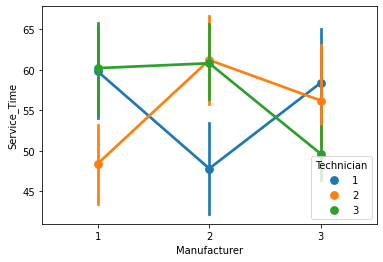

In [41]:
sns.pointplot(x='Manufacturer', y='Service_Time',data=df,hue='Technician')

### When the lines are parallel then there will be interaction. The above plot shows that their are no interaction between the two vaiables.

## 5) Perform a two-way ANOVA based on the variables ‘Manufacturer’ & ‘Technician’ with respect to the variables 'Service Time' and state your results.

In [42]:
formula='Service_Time~C(Manufacturer)+C(Technician)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.183381  0.833147
C(Technician)     2.0    24.577778  12.288889  0.159199  0.853365
Residual         40.0  3087.688889  77.192222       NaN       NaN


In [47]:
 formula='Service_Time~C(Manufacturer)+C(Technician)+C(Manufacturer):C(Technician)'
 model=ols(formula,df).fit()
 aov_table=anova_lm(model)
 print(aov_table)

                                 df       sum_sq     mean_sq         F  \
C(Manufacturer)                 2.0    28.311111   14.155556  0.272164   
C(Technician)                   2.0    24.577778   12.288889  0.236274   
C(Manufacturer):C(Technician)   4.0  1215.288889  303.822222  5.841487   
Residual                       36.0  1872.400000   52.011111       NaN   

                                 PR(>F)  
C(Manufacturer)                0.763283  
C(Technician)                  0.790779  
C(Manufacturer):C(Technician)  0.000994  
Residual                            NaN  
